In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("spam.tsv", sep='\t', quotechar='"')


In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
spam = data[data['label']=='spam']

In [8]:
ham = data[data['label']=='ham']

In [9]:
spam.shape, ham.shape

((747, 4), (4825, 4))

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
spam.shape, ham.shape

((747, 4), (747, 4))

In [12]:
data1 = ham.append(spam)

/var/folders/3l/gcw2f48j2pd2dp9lxqryhf300000gn/T/ipykernel_36628/2632624482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = ham.append(spam)


In [13]:
data1.head()

,label,message,length,punct
2487,ham,I dont thnk its a wrong calling between us,42,0
2254,ham,Lol enjoy role playing much?,28,1
3532,ham,Prepare to be pounded every night...,36,3
4837,ham,Yay can't wait to party together!,33,2
5479,ham,Really do hope the work doesnt get stressful. ...,61,2


In [14]:
data1.shape

(1494, 4)

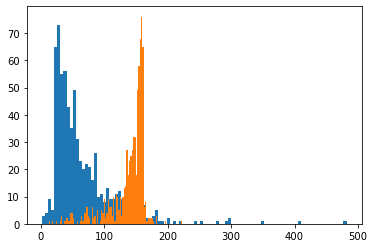

In [15]:
plt.hist(data1[data1['label']=='ham']['length'], bins = 100)
plt.hist(data1[data1['label']=='spam']['length'], bins = 100)
plt.show()

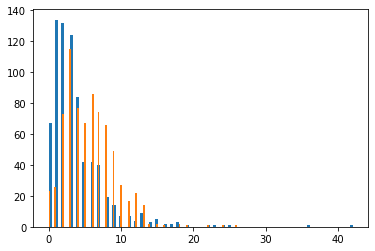

In [16]:
plt.hist(data1[data1['label']=='ham']['punct'], bins = 100)
plt.hist(data1[data1['label']=='spam']['punct'], bins = 100)
plt.show()

### Train the model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(data1['message'],data1['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [19]:
X_train.shape, X_test.shape

((1045,), (449,))

In [20]:
y_train.shape, y_test.shape

((1045,), (449,))

# Random Forest

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline

In [25]:
clasfr = Pipeline([("Tfidvect",TfidfVectorizer()),("Clasfr",RandomForestClassifier(n_estimators = 100))])

In [26]:
clasfr.fit(X_train,y_train)

Pipeline(steps=[('Tfidvect', TfidfVectorizer()),
                ('Clasfr', RandomForestClassifier())])

### Predict the Model

In [27]:
y_pred = clasfr.predict(X_test)

In [28]:
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', '

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [30]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [31]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 23, 199]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



### SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svm = Pipeline([("Tfidvect",TfidfVectorizer()),("Clasfr",SVC(C = 100, gamma = 'auto'))])

In [37]:
svm.fit(X_train,y_train)

Pipeline(steps=[('Tfidvect', TfidfVectorizer()),
                ('Clasfr', SVC(C=100, gamma='auto'))])

### Predict the Model

In [38]:
y_pred = svm.predict(X_test)

In [39]:
y_pred 

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'spam'

In [40]:
accuracy_score(y_test,y_pred)

0.9354120267260579

In [41]:
confusion_matrix(y_test,y_pred)

array([[219,   8],
       [ 21, 201]])

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.96      0.94       227
        spam       0.96      0.91      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



### Testing the model 

In [49]:
test1 = ["Hello, How are you?"]
test2 = ["Hi, Hope you are doing fine. You are our 100th customer and the lucky one. Claim your reward "]
test3 = ["Congratulations, you won an ipad and claim it now"]


In [50]:
print(clasfr.predict(test2))
print(clasfr.predict(test1))
print(clasfr.predict(test3))

['spam']
['ham']
['spam']
